In [1]:
from accordion import pdac
from accordion.Accordion import Accordion 
import seaborn as sns
import skimpy as skm

In [2]:
data = pdac.load_peng2019()

In [3]:
data = {i:data[i] for i in data.keys()  if i.find("_x_") < 0 }

In [4]:
AaccPDAC= Accordion(tbls=data,weight='lr_means')

In [5]:
AaccPDAC.make_pca()


In [6]:
for i in AaccPDAC.p.columns:
    AaccPDAC.p[i] = AaccPDAC.p[i]/AaccPDAC.p[i].sum()

In [7]:
AaccPDAC.compute_cost_all()

CTD


/home/james/.local/lib/python3.10/site-packages/accordion/distances.py:11: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G,weight=weight).todense()


('distance', 'correlation')
glasso


/home/james/.local/lib/python3.10/site-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/james/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:316: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.171e-03
  warnings.warn(


In [8]:
AaccPDAC.compute_wassestein(cost='correlation')

100%|███████████████████████████████████████████| 35/35 [00:00<00:00, 53.51it/s]


In [9]:
AaccPDAC.compute_wassestein(cost='CTD')

100%|███████████████████████████████████████████| 35/35 [00:00<00:00, 61.52it/s]


In [10]:
from sklearn.cluster import KMeans

In [11]:
clsm = KMeans(n_clusters=2)

In [12]:
import pydiffmap as dm

In [13]:
aux = dm.diffusion_map.DiffusionMap.from_sklearn(metric='precomputed',n_evecs = 3, epsilon =1, alpha = 0.5, k=64)
aux = aux.fit_transform(AaccPDAC.wdist['CTD'])

<AxesSubplot: >

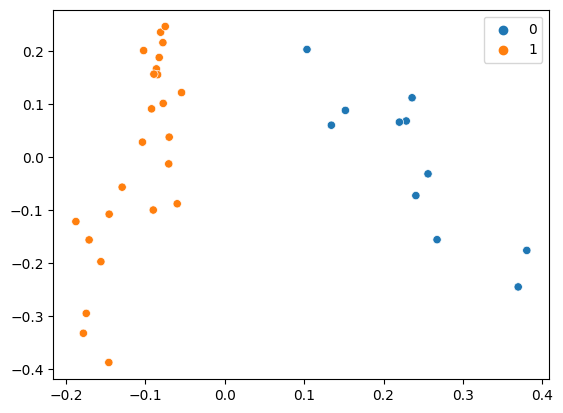

In [14]:
sns.scatterplot(x=aux[:,0],y=aux[:,1],hue=clsm.fit_predict(AaccPDAC.wdist['CTD'])) 

In [15]:
mtemp = AaccPDAC.Cs['CTD'].copy()

<AxesSubplot: ylabel='Density'>

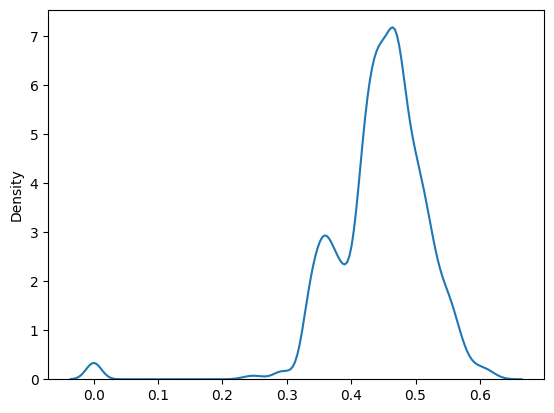

In [16]:
sns.kdeplot(mtemp.ravel())

In [17]:
import numpy as np

In [18]:
mtemp[mtemp>np.quantile(mtemp.ravel(), q=0.8)] = max(mtemp.ravel())

<AxesSubplot: ylabel='Density'>

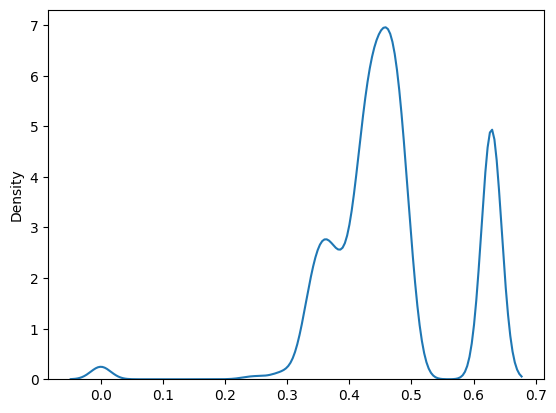

In [19]:
sns.kdeplot(mtemp.ravel())

In [20]:
AaccPDAC.Cs['PrunneCTD'] = mtemp

In [21]:
AaccPDAC.compute_wassestein(cost='PrunneCTD')

100%|███████████████████████████████████████████| 35/35 [00:00<00:00, 65.51it/s]


In [22]:
aux = dm.diffusion_map.DiffusionMap.from_sklearn(metric='precomputed',n_evecs = 3, epsilon =1, alpha = 0.5, k=64)
aux = aux.fit_transform(AaccPDAC.wdist['PrunneCTD'])

<AxesSubplot: >

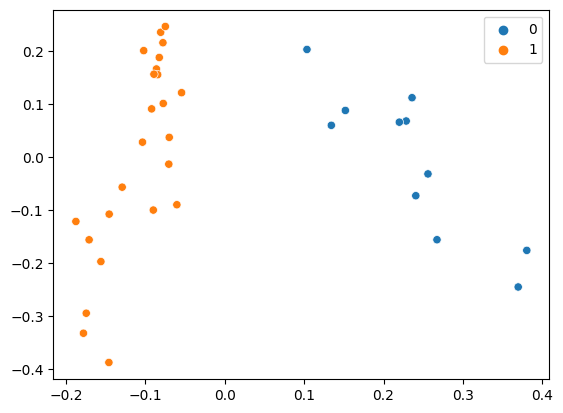

In [23]:
sns.scatterplot(x=aux[:,0],y=aux[:,1],hue=clsm.fit_predict(AaccPDAC.wdist['PrunneCTD'])) 

In [31]:
pdata_metadata = pdac.load_peng2019_metadata()

In [38]:
pdata_metadata['label1'] = ['Normal Pancreas' if i.find('normal')>=0 else 'PDAC' for i in pdata_metadata.accLabel]

In [ ]:
sns.scatterplot(x=aux[:,0],y=auax[:,1],hue=clsm.fit_predict(AaccPDAC.wdist['PrunneCTD'])) 

,accLabel,label1
accSample,,
T23,moderately-poorly differentiated PDAC,PDAC
T17,moderately differentiated PDAC,PDAC
N3,normal pancreas/duodenal intraepithelial neopl...,Normal Pancreas
T9,moderately-poorly differentiated PDAC,PDAC
T11,moderately-poorly differentiated PDAC,PDAC
N2,normal pancreas/small intestine papillary aden...,Normal Pancreas
T13,moderately-poorly differentiated PDAC,PDAC
N9,normal pancreas/pancratic neuroendocrine tumor,Normal Pancreas
N10,normal pancreas/choledochal neuroendocrine tumors,Normal Pancreas
